Descripción de los datos
La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

Uid: identificador único del usuario.
Device: dispositivo del usuario.
Start Ts: fecha y hora de inicio de la sesión.
End Ts: fecha y hora de término de la sesión.
Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):

Uid: identificador único del usuario que realiza un pedido.
Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.
La tabla costs (datos sobre gastos de marketing):

source_id: identificador de la fuente de anuncios.
dt: fecha.
costs: gastos en esta fuente de anuncios en este día.

In [22]:
import pandas as pd

# se genera una funcion para el analisis preliminar


def looks(datos):
    """Genera un analisis de todo el set de datos de manera gloabal"""

    print("Se ejecuta la descripcion de los datos:")

    print(datos.describe(include="all"))
    print()

    print("se hace exploracion con metodo info:")

    print(datos.info())
    print()

    print("se hace una observacion con el metodo Sample:")

    print(datos.sample(10))
    print()

    print("hay NA?:")
    print(datos.isna().sum())
    print()

    print("Duplicados:")
    print(datos.duplicated().sum())

In [23]:
cost = pd.read_csv("datasets/costs_us.csv")
cost["dt"] = pd.to_datetime(cost["dt"])
looks(cost)

Se ejecuta la descripcion de los datos:
         source_id                             dt        costs
count  2542.000000                           2542  2542.000000
mean      4.857199  2017-11-29 09:04:57.403619072   129.477427
min       1.000000            2017-06-01 00:00:00     0.540000
25%       2.000000            2017-08-30 00:00:00    21.945000
50%       4.000000            2017-11-29 00:00:00    77.295000
75%       9.000000            2018-02-28 00:00:00   170.065000
max      10.000000            2018-05-31 00:00:00  1788.280000
std       3.181581                            NaN   156.296628

se hace exploracion con metodo info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: dateti

In [24]:
orders = pd.read_csv("datasets/orders_log_us.csv")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"])
looks(orders)

Se ejecuta la descripcion de los datos:
                              buy_ts       revenue           uid
count                          50415  50415.000000  5.041500e+04
mean   2017-12-20 05:14:24.846176768      4.999647  9.098161e+18
min              2017-06-01 00:10:00      0.000000  3.135781e+14
25%              2017-10-13 17:28:00      1.220000  4.533567e+18
50%              2017-12-21 14:12:00      2.500000  9.102274e+18
75%              2018-03-02 16:10:00      4.890000  1.368290e+19
max              2018-06-01 00:02:00   2633.280000  1.844617e+19
std                              NaN     21.818359  5.285742e+18

se hace exploracion con metodo info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtyp

In [25]:
visits = pd.read_csv("datasets/visits_log_us.csv")
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
visits["end_ts"] = pd.to_datetime(visits["end_ts"])
visits["start_ts"] = pd.to_datetime(visits["start_ts"])
looks(visits)

Se ejecuta la descripcion de los datos:
         device                         end_ts      source_id  \
count    359400                         359400  359400.000000   
unique        2                            NaN            NaN   
top     desktop                            NaN            NaN   
freq     262567                            NaN            NaN   
mean        NaN  2017-12-18 06:28:15.036205056       3.750515   
min         NaN            2017-06-01 00:02:00       1.000000   
25%         NaN            2017-10-15 09:45:45       3.000000   
50%         NaN            2017-12-18 18:59:30       4.000000   
75%         NaN            2018-02-28 10:08:15       5.000000   
max         NaN            2018-06-01 01:26:00      10.000000   
std         NaN                            NaN       1.917116   

                             start_ts           uid  
count                          359400  3.594000e+05  
unique                            NaN           NaN  
top              

Visitas:

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
-  ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?



Visitas por dia:                uid
session_date      
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
...            ...
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256

[364 rows x 1 columns]
Visitas promedio por dia: uid    987.362637
dtype: float64
Duracion media de la sessión 60.0 segundos
factor de adherencia semanal uid    15.884409
dtype: float64
factor de adherencia semanal uid    3.90897
dtype: float64


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19.0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19.0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19.0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19.0


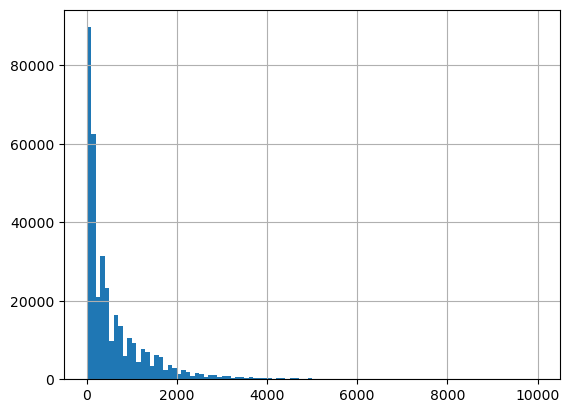

In [43]:
#se generan columnas adicionales para el analisis
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

# ¿Cuántas personas lo usan cada día, semana y mes?
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

dau_total = (
    visits.groupby(['session_year', 'session_date'])
    .agg({'uid': 'nunique'})
    .mean()
)

wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

#¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
vis_day = visits.groupby('session_date').agg({'uid': 'count'})
print('Visitas por dia:',vis_day)
print('Visitas promedio por dia:', vis_day.mean())

# ¿Cuál es la duración de cada sesión?
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
asl = visits['duration'].mode()[0]
print(f'Duracion media de la sessión {asl} segundos')
visits['duration'].hist(bins=100, range=(0, 10000))


#¿Con qué frecuencia los usuarios regresan?
sticky_wau = dau_total / wau_total * 100
print(f'factor de adherencia semanal {sticky_wau}')
sticky_mau = dau_total / mau_total * 100
print(f'factor de adherencia semanal {sticky_mau}')
visits


Ventas:

- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)




Marketing:
 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
 3. ¿Cuán rentables eran las inversiones? (ROMI)


Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Formato: Completa la tarea en un Jupyter Notebook. Inserta el código en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y encabezados.

